In [162]:
from bs4 import BeautifulSoup as bs
import requests
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# import time
from datetime import datetime

In [209]:
test = "https://www.youtube.com/playlist?list=UUFZ75Bg73NJnJgmeUX9l62g"
htmltest = requests.get(test)
testsoup = bs(htmltest.text, "lxml")
for a in testsoup.find_all("a", class_="pl-video-title-link"):
        print(a.text)




      Professor Green x Rag'n'Bone Man - Photographs (Cureton Remix)
    

      Calippo - All I Want
    

      M.O x Chip - Wondering (T. Matthias Remix)
    

      Blinkie - Take Control
    

      Elderbrook - Old Friend
    

      Selected Sessions Gorgon City Berlin DJ Set
    

      Dusky - Cold Heart
    

      Kartell - Attracted
    

      MK - 17 (6am Remix)
    

      Fisher - Stop It
    

      Dua Lipa & Silk City - Electricity (MK Remix)
    

      Curtis Gabriel - Only One
    

      Janet Jackson ft. Nelly - Call On Me (Disclosure Remix)
    

      CamelPhat & Cristoph - Breathe (ft. Jem Cooke)
    

      Rita Ora - Let You Love Me (Delta Jack Remix)
    

      Denney - Empire
    

      Rompasso - Ignis
    

      Jay Pryor - Make Luv
    

      Sage The Gemini - Gas Pedal (Motez Edit)
    

      Hayden James - Better Together (ft. Running Touch)
    

      Nora En Pure - Lioness
    

      La Roux - In For The Kill (Endor Remix) (Jerome Price Edi

In [211]:
len(testsoup.find_all("a", class_="pl-video-title-link"))

100

In [175]:
converted_date = ""
raw_months = {"Jan": 1, "Feb": 2, "Mar" : 3, "Apr" : 4, 
              "May" : 5, "Jun" : 6, "Jul" : 7, "Aug" : 8,
              "Sep" : 9, "Oct" : 10, "Nov" : 11, "Dec" : 12}

def convertDate(raw_date):
    
    converted_date = ""
    
    temp_date = raw_date.split(" ")
    
    number_month = raw_months.get(temp_date[0])
    
    date_str = (str(number_month) + "/" + temp_date[1] + "/" + temp_date[2]).replace(",", "")
    
    converted_date = datetime.strptime(date_str, '%m/%d/%Y')
    
    return converted_date

In [183]:
input_name = input("Enter Youtuber's Name: ")

list_name = input_name.split()

converted_name = input_name

if len(list_name) > 1:
    
    converted_name = ""
    
    for i in range(len(list_name)):

        converted_name = converted_name + list_name[i]
        
        if i != len(list_name)-1:
            converted_name = converted_name + "+"

search_name = converted_name

start_url = "https://www.youtube.com/results?search_query=" + search_name

Enter Youtuber's Name: gentlewhispering


In [184]:
print(start_url)
get_youtube_url_response = requests.get(start_url)

https://www.youtube.com/results?search_query=gentlewhispering


In [185]:
youtube_name_soup = bs(get_youtube_url_response.text, "lxml")

In [186]:
raw_youtube_name_link = youtube_name_soup.find_all("div", class_="yt-lockup-byline")[0].a.get("href")

videos_link = "https://www.youtube.com" + raw_youtube_name_link + "/videos"

about_link = "https://www.youtube.com" + raw_youtube_name_link + "/about"

print(videos_link)
print(about_link)

https://www.youtube.com/user/GentleWhispering/videos
https://www.youtube.com/user/GentleWhispering/about


In [187]:
# Get About Information
about_html = requests.get(about_link)

# Parse HTML
about_soup = bs(about_html.text, "lxml")

In [188]:
#artist_name = about_soup.find("title").text

artist_name = about_soup.find("meta", property="og:title").get("content")

subscribers = about_soup.find_all("span", class_="about-stat")[0].text
subscribers_int = int(subscribers.split(" ")[0].replace(",",""))

total_views = about_soup.find_all("span", class_="about-stat")[1].text
total_views_int = int(total_views[3:len(total_views)].split(" ")[0].replace(",",""))

joined = about_soup.find_all("span", class_="about-stat")[2].text
joined_temp = " ".join(joined.split(" ")[1:4])
joined_convert = convertDate(joined_temp)

print(f"Artist: {artist_name}")
print(f"Subscribers: {subscribers_int}")
print(f"Views: {total_views_int}")
print(f"Joined: {joined_convert}")

Artist: Gentle Whispering ASMR
Subscribers: 1550947
Views: 553140627
Joined: 2011-02-24 00:00:00


In [189]:
# Youtuber's Videos URL
url = videos_link

In [190]:
# Get Response
response = requests.get(url)

In [191]:
# Create Soup Object
soup = bs(response.text, 'lxml')

In [192]:
# Extract Data
meta = soup.find_all('ul', class_='yt-lockup-meta-info')
titles = soup.find_all('h3', class_='yt-lockup-title')
durations = soup.find_all('span', class_ = "video-time")
links = soup.find_all('h3', class_='yt-lockup-title')

In [193]:
# Get all URLs in a list
urls = []

for link in links: 

    url = link.a.get("href")
    
    urls.append("https://www.youtube.com" + url)

In [194]:
# Get all Durations in a list
duration_videos = []

for duration in durations:
    
    duration_time = duration.text
    
    duration_videos.append(duration_time)

In [195]:
# Get all Titles in a list
title_videos = []

for title in titles:
    
    title_text = title.find('a').text
    
    title_videos.append(title_text)   

In [196]:
# Get all Views and Dates in two lists
views = []
date = []

for data in meta:
    
    meta_data = data.find_all("li")

    string_views = meta_data[0].text.split(" ")[0]
    
    int_views = int(string_views.replace(",",""))
    
    views.append(int_views)

In [197]:
# Going to Each Video and Extracting Data
published_on = []

for i in range(len(urls)):
    
    video_url = urls[i]
    
    video_response = requests.get(video_url)
    
    video_soup = bs(video_response.text, 'lxml')
    
    raw_publish_date = video_soup.find("strong",class_="watch-time-text").text
    
    if raw_publish_date.split(" ")[0] == "Published":
        
        publish_date = raw_publish_date.split(" ")[2:5]

        publish_date_format = " ".join(publish_date)
        
        publish_date_convert = convertDate(publish_date_format)

        published_on.append(publish_date_convert)
    
    elif raw_publish_date.split(" ")[0] == "Premiered":
        
        publish_date = raw_publish_date.split(" ")[1:4]

        publish_date_format = " ".join(publish_date)
        
        publish_date_convert = convertDate(publish_date_format)

        published_on.append(publish_date_convert)
    
    

In [201]:
# Create DataFrame
df = pd.DataFrame({"Artist" : artist_name,
                   "Joined" : joined_convert,
                   "Subscribers" : subscribers_int,
                   "Total Views" : total_views_int,
                    "Date": published_on,
                   "Title" : title_videos,
                   "Duration" : duration_videos,
                   "Views" : views,
                   "URL" : urls,
                  })

df = df.sort_values("Date",ascending=False).reindex()
df

,Artist,Joined,Subscribers,Total Views,Date,Title,Duration,Views,URL
0,Gentle Whispering ASMR,2011-02-24,1550947,553140627,2018-12-03,GENTLE Dental Exam and Cleaning 👄 ASMR,25:49,767716,https://www.youtube.com/watch?v=-YmvorvCSSw
1,Gentle Whispering ASMR,2011-02-24,1550947,553140627,2018-11-26,Special Announcement 📢 Небольшое Объявление 📢 ...,59:16,441617,https://www.youtube.com/watch?v=-85twU3TWmg
2,Gentle Whispering ASMR,2011-02-24,1550947,553140627,2018-11-19,Autumn Vibes 🍁 Reese Ritual 🍫 Cozy ASMR 🕯️ Sof...,27:54,756137,https://www.youtube.com/watch?v=biiRWoQNmLQ
3,Gentle Whispering ASMR,2011-02-24,1550947,553140627,2018-11-14,Зеркальные Прикосновения • Шепот • АСМР,27:07,281134,https://www.youtube.com/watch?v=aPjflx9hnME
4,Gentle Whispering ASMR,2011-02-24,1550947,553140627,2018-11-12,Mirrored Touch • Whisper Ear-to-Ear • ASMR,27:09,954835,https://www.youtube.com/watch?v=ZnI7P-z_Aws
5,Gentle Whispering ASMR,2011-02-24,1550947,553140627,2018-11-07,🌶️ Triggers and Tees 👕 ASMR • Whisper Ear-to-Ear,27:21,622115,https://www.youtube.com/watch?v=6hSn0d033cQ
6,Gentle Whispering ASMR,2011-02-24,1550947,553140627,2018-10-28,Sassy Witch 🔮 ASMR 🔮 Soft Spoken,31:33,664298,https://www.youtube.com/watch?v=28CQghp9oYU
7,Gentle Whispering ASMR,2011-02-24,1550947,553140627,2018-10-24,Galaxy S9 📱 Whispered Unboxing • Candy Sounds ...,36:23,714618,https://www.youtube.com/watch?v=YKUzghnuVTY
8,Gentle Whispering ASMR,2011-02-24,1550947,553140627,2018-10-15,Women's Perfume Emporium 💖 ASMR • Soft Spoken ...,51:31,826840,https://www.youtube.com/watch?v=UUOdiWO3qwI
9,Gentle Whispering ASMR,2011-02-24,1550947,553140627,2018-10-08,✨ Dreamy Steam ✨ ASMR ♦ Layered Whispers ♦ Han...,29:42,1483833,https://www.youtube.com/watch?v=UOVnaIYOf3M


In [199]:
(df.Views.sum()/1000000)*2000

51716.388

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

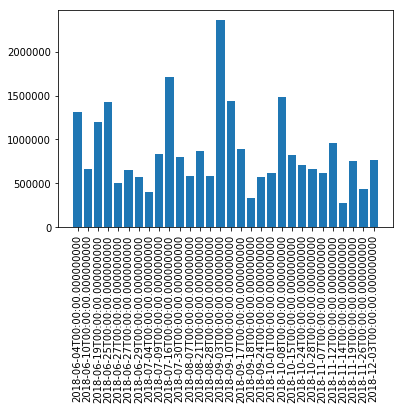

In [200]:
# Graph Data
plt.bar(np.arange(0,len(df),1),df["Views"], tick_label = df["Date"])
plt.xticks(rotation=90)